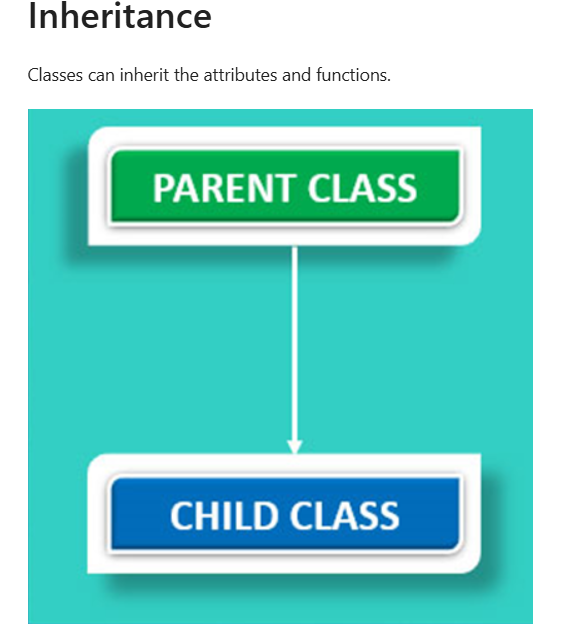

Child class will inherit the attributes and functions of parent class

In [1]:
class Person:

    def __init__(self, name, age):
        self.name = name
        self.age = age

    def intro(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")

In [3]:
class Employee(Person):

    def __init__(self, name, age, company):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work for {self.company}")

In [4]:
p1 = Person(name = "Sarthak", age = 28)

In [5]:
p1

In [6]:
type(p1)

__main__.Person

In [7]:
p1.name

'Sarthak'

In [8]:
p1.age

28

In [9]:
p1.intro()

My name is Sarthak
I am 28 years old


In [10]:
e1 = Employee(name = "Aditi", age = 25, company = "TCS")
e1

In [11]:
type(e1)

__main__.Employee

In [12]:
e1.name

'Aditi'

In [13]:
e1.age

25

In [14]:
e1.company

'TCS'

In [15]:
# Intro function is inherited from Parent class
e1.intro()

My name is Aditi
I am 25 years old


In [16]:
e1.work()

I work for TCS


In [17]:
e1.intro()
e1.work()

My name is Aditi
I am 25 years old
I work for TCS


In [18]:
e2 = Employee(28, "Raman", 3)
e2.name

28

In [19]:
e2.age

'Raman'

In [20]:
e2.name

28

In [23]:
type(e2)

__main__.Employee

In [24]:
e2.company

3

In [25]:
e2.intro()

My name is 28
I am Raman years old


In [26]:
e2.work()

I work for 3


# Pydantic Library for data validation in classes

In [27]:
%pip install pydantic email-validator

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Conditions in pydantic
1. ge - greater than or equal to
2. gt - greater than
3. le - less than or equal to
4. lt - less than

In [28]:
from pydantic import BaseModel, Field, EmailStr
from typing import Literal

In [29]:
class Student(BaseModel):
    roll_no: int = Field(description="Roll no of student", ge=101)
    name: str = Field(description="Name of student", min_length=3, max_length=50)
    age: int = Field(description="Age of student", ge=18, le=100)
    email: EmailStr = Field(description="Email of student")
    gender: Literal["male", "female"] = Field(description="Gender of student")
    hobbies: list[str] = Field(description="Hobbies of student", default_factory=list)

    def get_info(self):
        print(f"Roll Number : {self.roll_no}")
        print(f"Name : {self.name}")
        print(f"Age : {self.age} years")
        print(f"Email : {self.email}")
        print(f"Gender : {self.gender}")
        print(f"Hobbies : {self.hobbies}")

In [30]:
s1 = Student(
    roll_no= 123,
    name = "Rahul",
    age = 25,
    email= "rahul@gmail.com",
    gender= "male",
    hobbies= ["Cricket", "Singing"]
)

In [31]:
s1

Student(roll_no=123, name='Rahul', age=25, email='rahul@gmail.com', gender='male', hobbies=['Cricket', 'Singing'])

In [32]:
type(s1)

__main__.Student

In [33]:
s1.roll_no

123

In [34]:
s1.name

'Rahul'

In [35]:
s1.age

25

In [36]:
s1.gender

'male'

In [38]:
s1.email

'rahul@gmail.com'

In [39]:
s1.hobbies

['Cricket', 'Singing']

In [40]:
s1.get_info

<bound method Student.get_info of Student(roll_no=123, name='Rahul', age=25, email='rahul@gmail.com', gender='male', hobbies=['Cricket', 'Singing'])>

In [41]:
s1.get_info()

Roll Number : 123
Name : Rahul
Age : 25 years
Email : rahul@gmail.com
Gender : male
Hobbies : ['Cricket', 'Singing']


In [42]:
s2 = Student(
    roll_no= 145,
    name= "Priya",
    age = 35,
    email = "NotAvail",
    gender= "female",
    hobbies= ["Dancing"]
)

ValidationError: 1 validation error for Student
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='NotAvail', input_type=str]

In [43]:
s2

NameError: name 's2' is not defined

In [44]:
s3= Student(
    roll_no= 50,
    name= 3.4,
    age = 200,
    email = "random",
    gender= "M",
    hobbies= {"a": 1, "b":2}
)

ValidationError: 6 validation errors for Student
roll_no
  Input should be greater than or equal to 101 [type=greater_than_equal, input_value=50, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/greater_than_equal
name
  Input should be a valid string [type=string_type, input_value=3.4, input_type=float]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
age
  Input should be less than or equal to 100 [type=less_than_equal, input_value=200, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/less_than_equal
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='random', input_type=str]
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='M', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
hobbies
  Input should be a valid list [type=list_type, input_value={'a': 1, 'b': 2}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/list_type

In [45]:
s3

NameError: name 's3' is not defined

In [46]:
s1

Student(roll_no=123, name='Rahul', age=25, email='rahul@gmail.com', gender='male', hobbies=['Cricket', 'Singing'])

In [47]:
d = s1.model_dump()
d

{'roll_no': 123,
 'name': 'Rahul',
 'age': 25,
 'email': 'rahul@gmail.com',
 'gender': 'male',
 'hobbies': ['Cricket', 'Singing']}

In [48]:
d["name"]

'Rahul'

In [49]:
d["age"]

25